## Vor- und Nachname: 

# Aufgabe 2: Praxis 

Die Teile 1 bis 6 betragen insgesamt 70 Punkte.

Die 3 Bonus-Teile in dieser Aufgabe betragen insgesamt 30 Punkte, die zusaetzlich zu deiner Note hinzukommen koennen, als Bonus. Ich empfehle, erst die Hauptteile (1-6) zu behandeln. 

#### Tipp: Benutzen Sie die "Kernel--> Restart & Run All" Funktion von Jypyter vor Ihrer Abgabe, um sicherzustellen dass Ihr Code tatsaechlich funktioniert. Ihr koennen auch waehrend Ihrer Arbeit ab und zu diese Funktion benutzen um alle Variablen aus dem Memory wegzuloeschen und von vorne an wieder ausfuehren. 

#### Achtung: die Codes die Fehler ergeben und nicht durchgesetzt werden, werden nicht von mir debugged. 

## Beschreibung des Problems

Ein Unternehmen hat eine Umfrage durchgeführt und Informationen über Kunden gesammelt, die ein bestimmtes Produkt gekauft haben, und über Kunden, die es nicht gekauft haben. Das Unternehmen möchte eine ML Modell erstellen, mit dessen Hilfe sie vorhersagen können, welche Kunden das Produkt in Zukunft voraussichtlich kaufen werden. Mit dieser Anwendung können sie beispielsweise ihre Werbestrategie entwerfen und optimieren. 

## Teil 1: Laden und Überprüfen von Datensatz Umfrage.csv (auf dem Laufwerk, unter Projektarbeit)
Laden Sie den Datensatz Umfrage.csv (auf dem Laufwerk, unter Projektarbeit). Ziel ist es, die letzte Spalte (Label) in der CSV-Datei aus den vorherigen Spalten vorherzusagen.

Durchsuchen Sie den Datensatz und printen Sie Informationen (oder schreiben Sie Text), indem Sie die folgenden Fragen beantworten:

- Wie viele Datenpunkte haben wir? <br>
  Wir haben 15000 Datenpunkte
- Wie viele Features haben wir? <br>
  Wir haben 7 Features: Name, Height, Weight, Drink, Age, Einkommen, PLZ 
- Was sind ihre Typen?
  - Namen (categorical)
  - Height (numerical)
  - Weight (numerical)
  - Drink (ordinal)
  - Age (numerical)
  - Einkommen (numerical)
- Wie viele Klassen gibt es?
  - Es gibt 2 Klassen
- Was sind die möglichen Merkmalswerte (welche Werte kann jedes Feature haben)?
  - Name (cathegorical): irrelevant
  - Height (numerical): 151 - 201 
  - Weight (numerical):  56 - 112
  - Drink (ordinal): nein, gelegentlich, oft
  - PLZ (cathegorical): irrelevant (00000 - 99999)<br>
  - Einkommen (numerical): 0 - unendlich <br>
  
  - Siehe untn für speziell dieser Datensatz 

In [1]:
# Einbinden von Bibliotheken
import numpy as np
import pandas as pd
import time

from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV, KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# Einlesen und Kennenlernen der Daten
df = pd.read_csv('umfrage.csv')
df.head(20)

,Name,Height,Weight,Drink,Age,PLZ,Einkommen,Kaeufer
0,Unbekannt,165,102,Nein,35,16487,57098,Ja
1,Unbekannt,198,61,Oft,47,45252,77040,Ja
2,Unbekannt,191,68,Oft,73,75815,57805,Ja
3,Unbekannt,168,100,Nein,66,52188,62749,Nein
4,Unbekannt,188,94,Nein,60,80761,55282,Nein
5,Unbekannt,179,82,Gelegentlich,33,43389,61841,Ja
6,Unbekannt,152,106,Nein,68,68510,44468,Nein
7,Unbekannt,172,79,Oft,61,34385,24842,Ja
8,Unbekannt,152,93,Nein,54,19296,32904,Ja
9,Unbekannt,190,110,Gelegentlich,31,50418,109872,Nein


In [3]:
# Informationen über Länge, Features und Datenqualität
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       15000 non-null  object
 1   Height     15000 non-null  int64 
 2   Weight     15000 non-null  int64 
 3   Drink      15000 non-null  object
 4   Age        15000 non-null  int64 
 5   PLZ        15000 non-null  int64 
 6   Einkommen  15000 non-null  int64 
 7   Kaeufer    15000 non-null  object
dtypes: int64(5), object(3)
memory usage: 937.6+ KB


In [4]:
# Datenpunkte, Features 
print(df.shape)
print("Wir haben {} Datenpunkte".format(df.shape[0]))
print("Wir haben {} Features".format(df.shape[1]-1))

(15000, 8)
Wir haben 15000 Datenpunkte
Wir haben 7 Features


In [5]:
def investigate_dataframe(df):
    """
    Diese Funktion erstellt eine Zusammenfassung der Attribute einer Datenbanke
    Diese beinhaltet statistische Parameter für numerische Daten (Minimum, Maximum
    Mittelwert und Standard Abweichung) sowie Datenlänge, Fehlwerte,
    relativer Anteil der Fehlwerte, Anazhl verschiedener Werte und Datentyp
    """
    df2 = pd.DataFrame(index=['Minimum','Maximum','Average','Std.Dev.',
                               'Size','#NA', 'ratioNA', '#Uniques', 'dtypes'])
    numeric_types = [np.int, np.int8, np.int16, np.int32, np.int64,
                     np.float, np.float16, np.float32, np.float64 ]
    for c in df.columns:
        nval = len(df[c])
        nnan = df[c].isna().sum()
        rnan = round(nnan/nval,4)
        if df[c].dtypes in numeric_types:
            df2[c] = ([df[c].min(), df[c].max(), df[c].mean(), df[c].std(),
                       nval, nnan, rnan, df[c].nunique(),df[c].dtypes])
        else:
            df2[c] = ([np.nan, np.nan, np.nan, np.nan,
                       nval, nnan, rnan, df[c].nunique(),df[c].dtypes])
    return df2

In [6]:
# Wiviele Klassen haben wir? Wieviele Klassen gibt es im Label
# Wie sind die Werte verteilt

investigate_dataframe(df)
# Wir haben 7 Features. 
# Das Label Kaeufer hat 2 Klassen.

,Name,Height,Weight,Drink,Age,PLZ,Einkommen,Kaeufer
Minimum,NaN,151,56,NaN,25,10031,23003,NaN
Maximum,NaN,201,112,NaN,75,82999,109980,NaN
Average,NaN,175.939,84.0251,NaN,50.1189,46374.3,66378.3,NaN
Std.Dev.,NaN,14.5088,16.1165,NaN,14.4614,21054.4,25079.2,NaN
Size,15000,15000,15000,15000,15000,15000,15000,15000
#NA,0,0,0,0,0,0,0,0
ratioNA,0,0,0,0,0,0,0,0
#Uniques,1,51,57,3,51,13517,13831,2
dtypes,object,int64,int64,object,int64,int64,int64,object


## Teil 2: Bereiten Sie die Daten vor

- Entfernen Sie unnötige Features (falls vorhanden)
- Bei allen Datenpunkten sind alle Features vorhanden. Deswegen, brauchen Sie keine Imputation. 
- Codieren Sie kategoriale Features und Labels (Hinweis: Verwenden Sie pd.get_dummies)

In [7]:
# Auswahl der releventen Features
# Name ist irrelevant weil dieser nur einen Wert hat und nichts aussagt, ob jemand kauft der nicht
# PLZ ist eher irrelevant 
df_raw = df[['Height','Weight','Drink','Age','Einkommen', 'Kaeufer']]

# kategorisierung des Features Drink und des Labels Käufer
df_encoded = pd.get_dummies(df_raw,drop_first=True)

# Datensatz wird in Features (x) und Labels (y) aufgeteil
x = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]

df_encoded.head(5)

,Height,Weight,Age,Einkommen,Drink_Nein,Drink_Oft,Kaeufer_Nein
0,165,102,35,57098,1,0,0
1,198,61,47,77040,0,1,0
2,191,68,73,57805,0,1,0
3,168,100,66,62749,1,0,1
4,188,94,60,55282,1,0,1


In [8]:
x

,Height,Weight,Age,Einkommen,Drink_Nein,Drink_Oft
0,165,102,35,57098,1,0
1,198,61,47,77040,0,1
2,191,68,73,57805,0,1
3,168,100,66,62749,1,0
4,188,94,60,55282,1,0
...,...,...,...,...,...,...
14995,194,108,32,31762,0,0
14996,175,70,47,69843,1,0
14997,186,93,45,30662,0,0
14998,156,89,44,98756,0,1


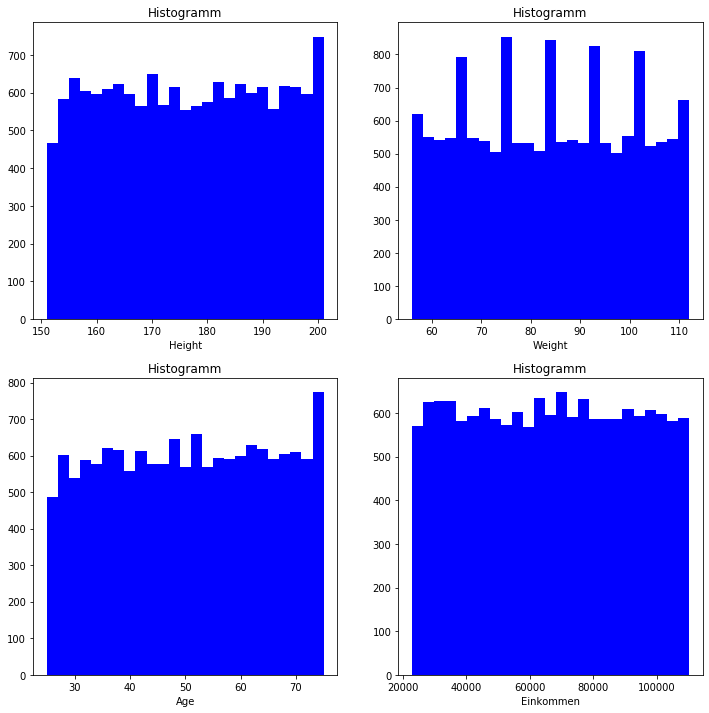

In [9]:
# Untersuchung der Features, wie die Werte verteilt sind.
fig, axs = plt.subplots(2,2,figsize=(12,12))
axs[0,0].hist(x.iloc[:,0],bins=25,color='b')
axs[0,0].set_title('Histogramm')
axs[0,0].set_xlabel('Height')
axs[0,1].hist(x.iloc[:,1],bins=25,color='b')
axs[0,1].set_title('Histogramm')
axs[0,1].set_xlabel('Weight')
axs[1,0].hist(x.iloc[:,2],bins=25,color='b')
axs[1,0].set_title('Histogramm')
axs[1,0].set_xlabel('Age')
axs[1,1].hist(x.iloc[:,3],bins=25,color='b')
axs[1,1].set_title('Histogramm')
axs[1,1].set_xlabel('Einkommen')
plt.show()

Die Daten der 4 Features sind annähern gleichverteil und haben ein Rauschen.

## Teil 3: Wählen Sie ein Modell

Tipp: Beginnen Sie mit train_test_split (random_seed = 0) und verwenden Sie dann ein Modell (z. B. k-nn) und spielen Sie manuell mit seinen Hyperparametern. Überprüfen Sie, ob Sie gute Genauigkeitswerte erhalten können. Wenn nicht, verwenden Sie ein anderes Modell und wiederholen Sie den Vorgang, bis Sie glauben, ein gutes Modell zu haben.

Hinweis: Versuchen Sie ein Tree-Modell, wie Random Forrest. Natuerlich koennen Sie auch andere Modelle benutzen. 

In [10]:
# Aufteilen des Datensates in einen Trainingsdatensatz und in einen Trainingsdatensatz

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

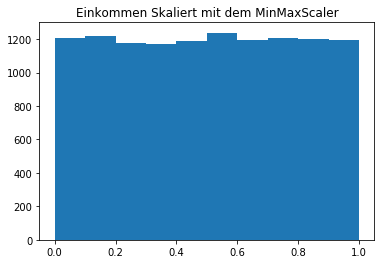

In [12]:
# Skalierung der Features da die Werte einen sehr unterschiedlichen Wertebereich einnehmen
# MinMaxScaler da die Daten gleichverteilt sind 

scaler = MinMaxScaler()
scaler.fit(x_train)

# Anwndung des Scalers auf die Features der Trainings- und der Testdaten

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Grafische Überprüfung der skalierten Verteilung

plt.subplot(1,1,1)
plt.title('Einkommen Skaliert mit dem MinMaxScaler')
plt.hist(x_train[:,3])
plt.show()

In [14]:
# Aufteilen des Trainingsdatensatzes in einem internen Trainings- und einem Validationsdatensatz

xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [15]:
# Einfacher k - nearest neighbor mit k=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xt, yt)

yt_pred = knn.predict(xt)
yv_pred = knn.predict(xv)
train_acc= accuracy_score(yt_pred, yt)
test_acc= accuracy_score(yv_pred, yv)
print("training and test accuracy: {:5.3f} {:5.3f}".format(train_acc,test_acc))

training and test accuracy: 0.817 0.743


Leichtes Overfitting mit k=5. Beim Tunen des Hyperparameters k (Anzahl der Nachbarn) ist Potential

In [16]:
# Standard Random Forest mit 100 Bäumen

rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=0)
rf.fit(xt, yt)

yt_pred = rf.predict(xt)
yv_pred = rf.predict(xv)
train_acc= accuracy_score(yt_pred, yt)
test_acc= accuracy_score(yv_pred, yv)
print("training and test accuracy: {:5.3f} {:5.3f}".format(train_acc,test_acc))

training and test accuracy: 1.000 0.794


sehr großes Overfitting. Die Hyperparameter müssen noch getunt werden. Hat wohl ein größeres Potential als Nearest Neighbor, da die Testgenauigkeit bereitS mit Standardwerten bei knapp 80% liegt.

In [17]:
# Logistic Regression mit Standard Werten

lr = LogisticRegression(random_state = 0)
lr.fit(xt, yt)

yt_pred = lr.predict(xt)
yv_pred = lr.predict(xv)
train_acc= accuracy_score(yt_pred, yt)
test_acc= accuracy_score(yv_pred, yv)
print("training and test accuracy: {:5.3f} {:5.3f}".format(train_acc,test_acc))

training and test accuracy: 0.685 0.700


Training und Testgenauigkeit sind beide recht niedrig. Das sieht nach underfiting aus. Man braucht ein komplexeres Modell

Trotz overfittings, scheint random forest das größte Potential zu haben. Es liefert mit den Standardkonfigurationen der Hyperparameter die bisten Ergebnisse der drei Modelle. Deshalb fällt die Wahl auf den Random Forest Classifier.

## Teil 4: Overfitting und underfettinig

Experimentieren Sie mit Hyperparametern, um eine Überanpassung (Overfitting) zu zeigen. Beschreiben Sie, was Sie getan und beobachtet haben.

Weiterm, experimentieren Sie mit Hyperparametern, um eine Unteranpassung (Underfitting) zu zeigen. Beschreiben Sie, was Sie getan und beobachtet haben.

In [18]:
# Experimente mit der Minimalen Samplesize to split

n_splits = [2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80]
n = len(n_splits)
train_acc = np.zeros((n),dtype=np.float32)
test_acc = np.zeros((n),dtype=np.float32)

In [19]:
for i in range(n):
    rf = RandomForestClassifier(n_estimators=50, min_samples_split=n_splits[i], min_samples_leaf=1, random_state=0)
    rf.fit(xt, yt)

    yt_pred = rf.predict(xt)
    yv_pred = rf.predict(xv)
    train_acc[i] = accuracy_score(yt_pred, yt)
    test_acc[i] = accuracy_score(yv_pred, yv)
    print("training and test accuracy for min_sample_splits={:02.0f}: {:5.3f} {:5.3f}".format(
        n_splits[i], train_acc[i],test_acc[i]))

training and test accuracy for min_sample_splits=02: 0.999 0.793
training and test accuracy for min_sample_splits=05: 0.957 0.795
training and test accuracy for min_sample_splits=10: 0.876 0.800
training and test accuracy for min_sample_splits=15: 0.839 0.805
training and test accuracy for min_sample_splits=20: 0.824 0.803
training and test accuracy for min_sample_splits=30: 0.817 0.806
training and test accuracy for min_sample_splits=40: 0.816 0.805
training and test accuracy for min_sample_splits=50: 0.815 0.806
training and test accuracy for min_sample_splits=60: 0.815 0.806
training and test accuracy for min_sample_splits=70: 0.815 0.806
training and test accuracy for min_sample_splits=80: 0.815 0.805


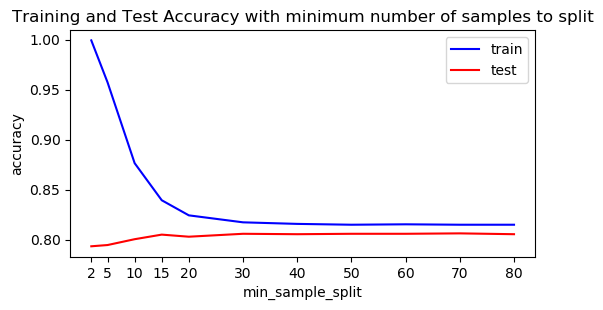

In [20]:
xax = np.array(np.arange(1,21))
fg = plt.figure(figsize=(6,3),dpi=100)
ax = plt.subplot(111)
ax.set_title('Training and Test Accuracy with minimum number of samples to split')
ax.set_xlabel('min_sample_split')
ax.set_ylabel('accuracy')
ax.set_xticks(n_splits)
plt.plot(n_splits,train_acc,color='b',label='train')
plt.plot(n_splits,test_acc,color='r',label='test')
plt.legend(loc=1)
plt.show()

Für eine kleine Anzahl von Splits haben wir ein starkes overfitting. Hohe Trainingsgenauigkeit. Die Testgenaugkeit erreicht bei 30 ihr Maximum und verbessert sich nicht. 

In [21]:
# Experimentieren mit der maximalen Tiefe des Baumes max_depth

m_depth = [2, 5, 10, 15, 20, 25, 30, 35, 40]
n = len(m_depth)
train_acc = np.zeros((n),dtype=np.float32)
test_acc = np.zeros((n),dtype=np.float32)

In [22]:
for i in range(n):
    rf = RandomForestClassifier(max_depth=m_depth[i], n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=0)
    rf.fit(xt, yt)

    yt_pred = rf.predict(xt)
    yv_pred = rf.predict(xv)
    train_acc[i] = accuracy_score(yt_pred, yt)
    test_acc[i] = accuracy_score(yv_pred, yv)
    print("training and test accuracy for max_depth={:02.0f}: {:5.3f} {:5.3f}".format(
        m_depth[i], train_acc[i],test_acc[i]))

training and test accuracy for max_depth=02: 0.814 0.806
training and test accuracy for max_depth=05: 0.815 0.806
training and test accuracy for max_depth=10: 0.817 0.806
training and test accuracy for max_depth=15: 0.880 0.802
training and test accuracy for max_depth=20: 0.987 0.797
training and test accuracy for max_depth=25: 1.000 0.791
training and test accuracy for max_depth=30: 1.000 0.793
training and test accuracy for max_depth=35: 1.000 0.792
training and test accuracy for max_depth=40: 1.000 0.794


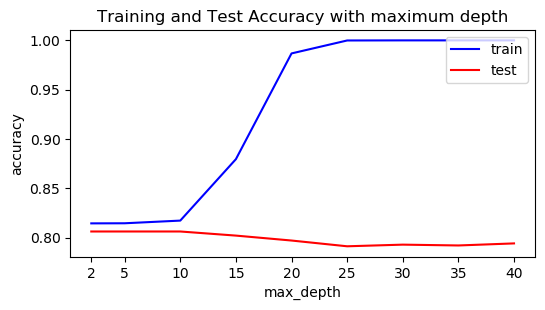

In [23]:
xax = np.array(np.arange(1,21))
fg = plt.figure(figsize=(6,3),dpi=100)
ax = plt.subplot(111)
ax.set_title('Training and Test Accuracy with maximum depth')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
ax.set_xticks(m_depth)
plt.plot(m_depth,train_acc,color='b',label='train')
plt.plot(m_depth,test_acc,color='r',label='test')
plt.legend(loc=1)
plt.show()

Für kleine max_depth sind Trainings- und Testaccuracy sehr ausbalanciert. Wenn die Tiefe aber größer als 10 eird steigt die Trainingsgenauigkeit signifikant an, während die Testgenauigkeit leicht sinkt. Das beeutet, wir haben ein Overfiting. Random Forest wird zu komplex weil die Bäume zu komplex werden.

In [24]:
# Experimentieren mit der Anzahl an Entscheidungsbäumen

n_trees = [1]
n_trees.extend(list(range(5,100,20)))
n_trees.extend(range(100,501,50))
print(n_trees)

n = len(n_trees)
train_acc = np.zeros((n),dtype=np.float32)
test_acc = np.zeros((n),dtype=np.float32)

[1, 5, 25, 45, 65, 85, 100, 150, 200, 250, 300, 350, 400, 450, 500]


In [25]:
for i in range(n):
    rf = RandomForestClassifier(n_estimators=n_trees[i], max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)
    rf.fit(xt, yt)

    yt_pred = rf.predict(xt)
    yv_pred = rf.predict(xv)
    train_acc[i] = accuracy_score(yt_pred, yt)
    test_acc[i] = accuracy_score(yv_pred, yv)
    print("training and test accuracy for n_estimators={:02.0f}: {:5.3f} {:5.3f}".format(
        n_trees[i], train_acc[i], test_acc[i]))

training and test accuracy for n_estimators=01: 0.886 0.696
training and test accuracy for n_estimators=05: 0.966 0.759
training and test accuracy for n_estimators=25: 0.996 0.790
training and test accuracy for n_estimators=45: 0.999 0.791
training and test accuracy for n_estimators=65: 1.000 0.791
training and test accuracy for n_estimators=85: 1.000 0.792
training and test accuracy for n_estimators=100: 1.000 0.794
training and test accuracy for n_estimators=150: 1.000 0.793
training and test accuracy for n_estimators=200: 1.000 0.792
training and test accuracy for n_estimators=250: 1.000 0.793
training and test accuracy for n_estimators=300: 1.000 0.792
training and test accuracy for n_estimators=350: 1.000 0.793
training and test accuracy for n_estimators=400: 1.000 0.793
training and test accuracy for n_estimators=450: 1.000 0.794
training and test accuracy for n_estimators=500: 1.000 0.794


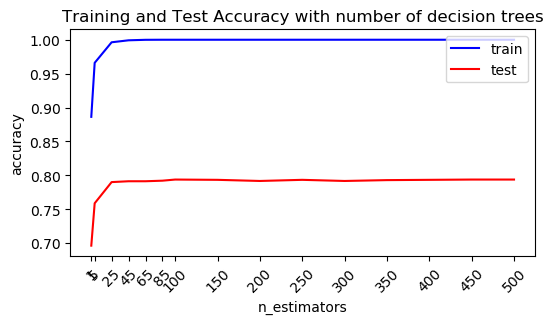

In [26]:
xax = np.array(np.arange(1,21))
fg = plt.figure(figsize=(6,3),dpi=100)
ax = plt.subplot(111)
ax.set_title('Training and Test Accuracy with number of decision trees')
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.set_xticks(n_trees)
plt.xticks(rotation=45)
plt.plot(n_trees,train_acc,color='b',label='train')
plt.plot(n_trees,test_acc,color='r',label='test')
plt.legend(loc=1)
plt.show()

Für wenige estimators ist die Genauigkeit gering. Wir haben underfitting und es kein Random Forest.  und steigt rasch an und teigt ab 25 Bäumen nicht mehr signifikant an. 

## Teil 5: Optimieren Sie Hyperparameter mithilfe der Gittersuche

Hinweis: GridsearchCV benutzen um das beste bzw. die besten Hyperparameter festzustellen. 

In [15]:
#n_splits = [5, 10, 15, 20, 25, 30, 40, 50]
#m_depth = [None, 2, 4, 6, 8, 10, 12]
#n_trees = [100, 150, 200]
#n_leaves = [1, 10, 30, 50]

n_splits = [5, 10, 15, 20]
m_depth = [None, 4, 6, 10]
n_trees = [100]
n_leaves = [1, 5, 10, 15]
parameters = {"n_estimators": n_trees,
              "max_depth": m_depth,
              "min_samples_split": n_splits,
              "min_samples_leaf":n_leaves}

# nested cross validation with 4 splits
inner_cv = KFold(n_splits=4, shuffle=True, random_state=0)

# Grid Search: Grid of parameters
random_forest = RandomForestClassifier(random_state=0)
best_forest = GridSearchCV(estimator=random_forest, param_grid=parameters, cv=inner_cv)


In [16]:
t1 = time.time()
best_forest.fit(x_train, y_train)
t2 = time.time()
print('Fitting of the model needed {:6.2} seconds'.format(t2-t1))

Fitting of the model needed 1.6e+03 seconds


In [17]:
print(best_forest.best_estimator_)
print(best_forest.best_params_)
print(np.round(best_forest.best_score_,3))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
0.813


Das besten Random Forest Modell finden wir für folgende Hyperparameter 
  - max_depth = 10
  - min_samples_leaf = 1
  - min_samples_split = 15
  - n_estimators = 100
  
Der Score liegt dafür bei 0.813

## Teil 6: Evaluieren Sie das Modell

Mit den optimierten Hyperparameter, evaluarieren Sie das Modell mithifle von cross validation. Zusaetzlich, koennen Sie  F1-score, Sensitivity und Specificty Werte fuer ein einzigen train_test_split erzeugen. 

In [42]:
# Jetzt bilden wir den Random Forest mit den besten Werten
# Gearbeitet wird mit den Trainings und Testdaten vom ersten train_test_split

rf_best = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1, min_samples_split=15, random_state=0)
rf_best.fit(x_train, y_train)
y_train_pred = rf_best.predict(x_train)
y_test_pred = rf_best.predict(x_test)

# Überprüfung auf Overfitting - Hat GridSearch gut gearbeitet?
train_acc= accuracy_score(y_train_pred, y_train)
test_acc= accuracy_score(y_test_pred, y_test)
print("training and test accuracy: {:5.3f} {:5.3f}".format(train_acc,test_acc))

training and test accuracy: 0.813 0.803


Sieht optimal aus. Test- und Trainings-Accuracy sind gut ausbalanciert

sensitivity    0.680
specivity      0.930
f1-score       0.780


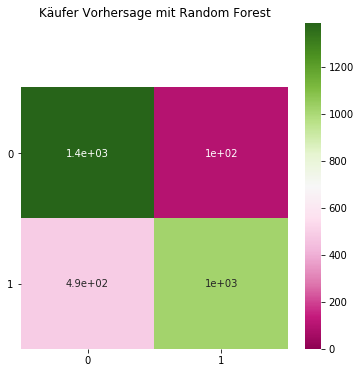

In [44]:
# Evaluation des Modelles mit dem Testdatensatz

# Berechung der Test Skill Scores und der Konfusionsmatrix 
confusion = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion.ravel()
ap = np.array(np.where(y_test==1)).size
an = np.array(np.where(y_test==0)).size
sens = np.round(tp/ap,2)
spec = np.round(tn/an,2)
f1 = np.round(f1_score(y_test, y_test_pred),2)

print("{:15}{:5.3f}".format('sensitivity ', sens))
print("{:15}{:5.3f}".format('specivity ', spec))
print("{:15}{:5.3f}".format('f1-score ', f1))

plt.figure(figsize = (6,6))
sns.heatmap(confusion, vmin=-1, cmap='PiYG', annot=True)
plt.title('Käufer Vorhersage mit Random Forest')
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.0#5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Das Modell liefert sehr gute Ergebnisse. Die meisten Labels, etwa 2400, werden richtig vorhergesagt. Die Summe aus True Positive und True Negative. Etwa 590 werden falsch vorhergesagt. Man sieht, dass 80% der Daten richtig vorhergesagt werden.

## Bonus Teil 1: 

Können Sie begründen, warum Ihr ausgewähltes Modell eine gute Leistung erbringt? 

inweis: Falls Sie ein Tree-Modell (wie RandomForrest) gewaehlt haben konnen Sie erst die wichtigen Features anhald _feature _ importances_ erkennen. Dann zeichnen Sie Ihre Daten für 2 der ausgewählten Features (mithilfe von plt.scatter (Feature1, Feature2, c = Label), um zu sehen, wie die Daten verteilt sind

Random Forest schafft es nach der Regulierung der Features sehr gute Ergebnisse zu liefen und zeigt eine schöne Abgrenzung der Beiden Klassen im Scatter Plot.

Decision Boundaries sind der Optimalfall für Entscheidungsbäume. Diese haben wir hier.

Feature ranking:
1. feature 3 (0.507322)
2. feature 2 (0.422523)
3. feature 1 (0.032245)
4. feature 0 (0.031166)
5. feature 4 (0.003718)
6. feature 5 (0.003026)


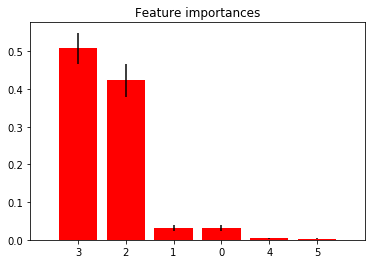

In [45]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = rf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()


In [46]:
x.columns

Index(['Height', 'Weight', 'Age', 'Einkommen', 'Drink_Nein', 'Drink_Oft'], dtype='object')

Die Features  2 (Age) und 3 (Einkommen) sind am wichtigsten und tragen am eintscheidensten zu Vorhersage bei. 

In [53]:
# Händische Ausgabe der Feature sortiert nach deren Wichtigkei
ind = np.argsort(rf_best.feature_importances_)
nf = rf_best.n_features_
print('index  importances Feature-Name')
for i in range(nf):
    print("{:5.0f} {:5.2f}        {:}".format(ind[i],
          np.round(np.sort(rf_best.feature_importances_)[i],2),
          x.columns[ind[i]]))

index  importances Feature-Name
    5  0.00        Drink_Oft
    4  0.00        Drink_Nein
    0  0.03        Height
    1  0.03        Weight
    2  0.42        Age
    3  0.51        Einkommen


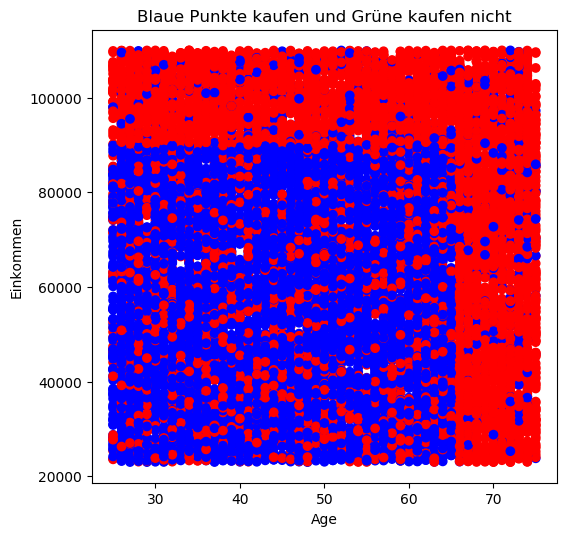

In [69]:

color = ['blue' if label == 0 else 'red' for label in y]

plt.figure(figsize=(6,6),dpi=100)
plt.title("Blaue Punkte kaufen und Grüne kaufen nicht")
im = plt.scatter(x.iloc[:,2], x.iloc[:,3], c=color)
plt.xlabel('Age')
plt.ylabel('Einkommen')
plt.show()

## Bonus Teil 2: 
Führen Sie eine nested Kreuzvalidierung (cross-validation) für den ausgewaehlten Features durch

In [58]:
from sklearn.feature_selection import RFECV

nested_cv = KFold(n_splits=5, shuffle=True, random_state=0)

rf_2f = RandomForestClassifier(n_estimators=100, 
                               max_depth=10, 
                               min_samples_leaf=1, 
                               min_samples_split=15, 
                               random_state=0)

In [60]:
t1 = time.time()
selector = RFECV(rf_2f, min_features_to_select=1, step=1, cv=nested_cv)
t2 = time.time()
print('RFECV needed {:6.3} seconds'.format(t2-t1))

RFECV needed 0.000999 seconds


In [84]:
# Auswahl der erste 4 Features vom Trainingsdatensatz
x_neu = x_train[:,1:4]

In [85]:
t1 = time.time()
selector = selector.fit(x_neu, y_train)
t2 = time.time()
print('Fitting needed {:6.3} seconds'.format(t2-t1))

Fitting needed 1.23e+02 seconds


In [86]:
print(selector.ranking_)
print(selector.grid_scores_)
print(selector.support_)

[1 1 1]
[0.69066667 0.81166667 0.81233333]
[ True  True  True]


3 Features wurden ausgewählt. Diese sind Feature 1, 2, 3 bzw. 'Weight', 'Age' und 'Einkommen'. 

In [87]:
y_train_pred = selector.predict(x_neu)
y_test_pred = selector.predict(x_test[:,1:4])

# Überprüfung auf Overfitting - Hat GridSearch gut gearbeitet?
train_acc= accuracy_score(y_train_pred, y_train)
test_acc= accuracy_score(y_test_pred, y_test)
print("training and test accuracy: {:5.3f} {:5.3f}".format(train_acc,test_acc))

training and test accuracy: 0.814 0.803


Die Genauigkeit ist mit 3 Features im Vergleich zu allen Features um 0.001 gestiegen.

## Bonus Teil 3:

Gibt es einen Standard-Kauefer? Anders gesagt, gibt es einen typischen Kunde der hoechstwahrscheinlich kaeuft? 

Achtung: diese Aufgabe ist etwa schwrieger als die anderen. 

In [9]:
# Platz fuer Ihren Code/Anworten